# Clasificación

En este capítulo, se te presentarán los problemas de clasifiación y aprenderás a resolverlos mediante técnicas de aprendizaje supervisado. Aprenderás a dividir los datos en conjuntos de entrenamiento y de prueba, ajustar un modelo, hacer predicciones y evaluar la precisión. Descubrirás la relación entre la complejidad del modelo y el rendimiento, aplicando lo que aprendas a un conjunto de datos de rotación, donde clasificarás el estado de rotación de los clientes de una empresa de telecomunicaciones.

## Machine learning con scikit-learn

-   ¿Qué es el machine learning?

    -   Es el proceso mediante el cual:
        -   Se da a los ordenadores la capacidad de aprender a tomar decisiones a partir de datos.
        -   ¡Sin haber sido programados explícitamente!

-   Ejemplos de machine learning

    -   Clasificación de correos de spam o no en relación al contenido y su remitente.
    -   Agrupar libros por categorías en función de las palabras que contiene.

-   Aprendizaje no supervisado

    -   Descubrir patrones ocultos a partir de datos no etiquetados.
    -   Ejemplo
        -   Agrupar a los clientes en categorías distintas (agrupación en clústeres)

            ![](images/paste-1.png){width="83%"}

-   Aprendizaje supervisado

    -   Los valores previstos son conocidos.

    -   Objetivo: predecir los valores objetivo de los datos no vistos, dadas las características.

        ![](images/paste-2.png){width="80%"}

-   Tipos de aprendizaje supervisado

    +--------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------+
    | -   Clasificación: La variable objetivo consta de categorías.            | -   Regresión: La variable objetivo es continua.                                                                                                           |
    |                                                                          |                                                                                                                                                            |
    |     Ejemplo: Predecir si una transferencia bancaria es fraudulenta o no. |     Ejemplo: Un modelo puede utilizar características como el número de habitaciones y el tamaño de una propiedad para predecir el precio de la propiedad. |
    +--------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------+

-   Convenciones de denominación

    -   Característica = variable predictora = variable independiente

    -   Variable objetivo = variable dependiente = variable de respuesta

-   Antes de utilizar el aprendizaje supervisado

    -   Requisitos:
        -   Que no falten valores.
        -   Que los datos esten en formato numérico.
        -   Que los datos esten almacenados en un DataFrame de pandas o en una matriz de Numpy.
    -   Hay que realizar primero un análisis exploratorio de datos (AED)

-   Sintaxis de scikit-learn

    -   Scikit-learn sigue la misma sintaxis para todos los modelos de aprendizaje supervisado lo que hace que el flujo de trabajo sea reproducible.

In [1]:
#| echo: true
#| eval: false
from sklearn.module import Model
model = Model()
model.fit(X, y)
predictions = model.predict(X_new)
print(predictions)

![](images/paste-3.png)

### Clasificación binaria

Hay dos tipos de aprendizaje supervisado: clasificación y regresión. La clasificación binaria se utiliza para predecir una variable objetivo que solo tiene dos etiquetas, normalmente representados numéricamente con un cero o un uno.

A continuación se muestra la página `.head()` de un conjunto de datos `churn_df`. Puedes esperar que el resto de los datos contengan valores similares.

![](images/paste-4.png)

Observando estos datos, ¿Qué columna podría ser la variable objetivo de la clasificación binaria?

**Respuestas posibles**

-   [ ] "`customer_service_calls`"

-   [ ] "`total_night_charge`"

-   [x] "`churn`"

-   [ ] "`account_lenght`"

`churn` tiene valores de `0` y `1`, por lo que se puede predecir utilizando un modelo de clasificación binaria.

### El flujo de trabajo del aprendizaje supervisado

Recuerda que sckikit-learn ofrece un flujo de trabajo repetible para utilizar modelos de aprendizaje supervisado con el fin de predecir los valores de la variable objetivo cuando se presentan nuevos datos.

Reordena el pseudocódigo proporcionado para que represente con precisión el flujo de trabajo de construir un modelo de aprendizaje supervisado y hacer predicciones.

#### Instrucciones

-   Arrastra los bloques de código en el orden correcto para representar cómo se ejecutaría el flujo de trabajo de aprendizaje supervisado.

    ![](images/paste-5.png){width="80%"}

Puedes ver cómo scikit-learn permite hacer predicciones ¡con solo unas pocas líneas de código!

## El reto de la clasificación

-   Clasificar etiquetas de datos no vistos

1.  Se construye un modelo.

2.  El modelo aprende de los datos etiquetados que le pasamos.

3.  Le pasamos datos no etiquetados al modelo como entrada.

4.  El modelo predice las etiquetas de los datos no vistos.

    -   Datos etiquetados = datos de entrenamiento

-   K vecinos más cercanos (KNN)
    -   Predecir la etiqueta de un punto de datos:
        -   Observando los `k` puntos de datos etiquetados más cercanos.
        -   Utilizando el voto por mayoría.

|                           |                           |
|---------------------------|---------------------------|
| si k = 3                  | si k = 5                  |
| ![](images/paste-7.png)   | ![](images/paste-9.png)   |
| Se clasificaría como roja | Se clasificaría como azul |

-   Intuición KNN

    Se muestra un gráfico de dispersión que muestra la tarifa nocturna total frente a la tarifa diaria total de los clientes de una empresa de telecomunicaciones. Azul representa a los clientes que se han dado de baja y los de rojo a los que no.

    |                          |                          |
    |--------------------------|--------------------------|
    | ![](images/paste-10.png) | ![](images/paste-11.png) |

    KNN crea un límite de decisión para predecir si los clientes se darán de baja. Se prevee que los clientes en la franja con fondo gris, se darán de baja.

-   Utilizar scikit-learn para ajustar un clasificador

In [2]:
#| echo: true
#| eval: false
from sklearn.neighbors import KNeighborsClassifier
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
print(X.shape, y.shape)

    ![](images/paste-13.png)

In [3]:
#| echo: true
#| eval: false
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

-   Predecir con datos no etiquetados

In [4]:
#| echo: true
#| eval: false
X_new = np.array([[56.8, 17.5],
                  [24.4, 24.1],
                  [50.1, 10.9]])

print(X_new.shape)

![](images/paste-14.png)

In [5]:
#| echo: true
#| eval: false
predictions = knn.predict(X_new)
print('Predictions: {}' .format(predictions))

![](images/paste-15.png)

### Ajustar KNN: k vecinos más cercanos

En este ejercicio, construirás tu primer modelo de clasificación utilizando el conjunto de datos `churn_df`, que se ha precargado para el resto del capítulo.

El objetivo, `churn` tiene que ser una sola columna con el mismo múmero de observaciones que los datos de las características. Los datos de las características ya se han convertido en matrices `numpy`.

"`account_length`" y "`costumer_service_calls`" se tratan como características porque la duración de la cuenta indica fidelidad del cliente, las llamadas frecuentes al servicio de atención al cliente pueden ser señal de insatisfacción y ambas pueden ser buenos predictores de la rotación.

#### Instrucciones

-   Importa `KNeighborsClassifier` desde `sklearn.neighbors`.
-   Instncia un `KNeighborsClassifier` llamado `knn` con `6` vecinos.
-   Ajusta el clasificador a los datos utilizando el método `.fit()`.

In [6]:
import pandas as pd

ruta = './data/churn_df.csv'
churn_df = pd.read_csv(ruta)
churn_df.head()

,account_length,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,customer_service_calls,churn
0,101,45.85,17.65,9.64,1.22,3,1
1,73,22.30,9.05,9.98,2.75,2,0
2,86,24.62,17.53,11.49,3.13,4,0
3,59,34.73,21.02,9.66,3.24,1,0
4,129,27.42,18.75,10.11,2.59,1,0


In [7]:
# Import KNeigborsClassifier
from sklearn.neighbors import KNeighborsClassifier

y = churn_df['churn'].values
X = churn_df[['account_length', 'customer_service_calls']].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",6
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


¡Excelente! Ahora que tu clasificador KNN ha sido ajustado a los datos, puede ser utilizado para predecir las etiquetas de nuevos puntos de datos.

### Predecir KNN: k vecinos más cercanos

Ahora que has ajustado tu clasificador KNN, puedes utilizarlo para predecir la etiqueta de nuevos puntos de datos. Para el entrenamiento se utilizaron todos los datos disponibles, pero, afortunadamente, hay nuevas observaciones disponibles. Se han precargado como `X_new`.

In [8]:
import numpy as np
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

#### Instrucciones

-   Crea `y_pred` prediciendo los valores objetivo de las características no vistas `X_new` utilizando el modelo `knn`.

-   Imprime las etiquetas predichas para el conjunto de predicciones.

In [9]:
# Predict the labs for the X_new
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred))

Predictions: [0 1 0]


El modelo ha predicho que los primeros y terceros clientes no se darán de baja en el nuevo array. Pero, ¿cómo sabemos qué tan precisas son estas predicciones? Vamos a explorar cómo medir el rendimiento de un modelo en el próximo video.

## Medir el rendimiento del modelo

-   Medir el rendimiento del modelo

    -   En clasificación, se utiliza a menudo la métrica de la precisión.

    -   Precisión: $$
        \frac{\text{Predicciones correctas}}{\text{total de observaciones}}
        $$

    -   ¿Cómo medimos la precisión?

    -   Podría calcular la precisión de los datos utilizados para ajustar el clasificador.

    -   NO sería indicativo de la capacidad de generalización

-   Precisión del cálculo

    ![](images/paste-16.png){width="60%"}

-   Entrenamiento/prueba de la división

In [10]:
#| echo: true
#| eval: false
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_text, y_test))

    ![](images/paste-17.png)

-   Complejidad del modelo

    -   k mayor = modelo menos complejo = puede provocar un ajuste insuficiente (underfitting)

    -   k menor = modelo más complejo = puede llevar a un sobreajuste (overfitting)

        ![](images/paste-18.png){width="80%"}

-   Complejidad del modelo y sobreajuste o o ajuste insuficiente

In [11]:
#| echo: true
#| eval: false
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

-   Representación gráfica de nuestros resultados

In [12]:
#| echo: true
#| eval: false
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

-   Curva de complejidad del modelo

    ![](images/paste-19.png){width="80%"}

### División entrenamiento/prueba + cálculo de precisión

¡Es hora de practicar la división de tus datos en conjuntos de entrenamiento y de prueba con el conjunto de datos `churn_df`!

#### Instrucciones

- Importa `train_test_split` desde `sklear.model_selection`.
- Divide `X` y `y` en conjuntos de entrenamiento y de prueba, estableciendo `test_size` igual al 20%, `random_state` a `42`, y asegurándote que las proporciones de las etiquetas objetivo reflejan las del conjunto de datos original.
- Ajusta el modelo `knn` a los datos de entrenamiento.
- Calcula e imprime la precisión del modelo para los datos de prueba.

In [13]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop('churn', axis=1).values
y = churn_df['churn'].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8740629685157422


::: {.callout-important title="¿Por qué usar `stratify=y`?" collapse="true"}
En problemas de **clasificación**, `stratify=y` hace que el **split** mantenga en **train** y **test** la misma proporción de clases que hay en el conjunto original.
Esto es especialmente útil cuando las clases están **desbalanceadas** (por ejemplo, pocos casos de `churn=1`), porque evita que el conjunto de prueba quede con muy pocos (o cero) ejemplos de la clase minoritaria, lo que haría que métricas como *accuracy* sean engañosas.
:::

¡Excelente! En unas pocas líneas de código se dividió un conjunto de datos, se ajustó un modelo KNN y se encontró que su precisión es del 87%.

### Sobreajuste e infraajuste

Interpretar la complejidad del modelo es una buena forma de evaluar el rendimiento del aprendizaje supervisado. Tu objetivo es producir un modelo que pueda interpretar la relación entre las características y la variable objetivo, así como generalizar bien cuando se exponga a nuevas observaciones.

::: {.callout-note collapse="true"}
Para poder hacer el ejecicio fue necesario cargar el dataset `Telecom Churn Data.csv` para posteriormente dividir las características y la variable objetivo, similar al ejercicio en DAtaCamp.
:::

In [14]:
ruta1 = './data/Telecom Churn Data.csv'
churn_df1 = pd.read_csv(ruta1)

X = churn_df1.drop('churn', axis=1).values
y = churn_df1['churn'].values

# División de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

#### Instrucciones

- Crea `neighbors` como una matriz `numpy` de valores desde `1` hasta `12` inclusive.
- Instancia un `KNeighborsClassifier`, con el número de vecinos igual al iterador `neighbor`
- Ajusta el modelo a los datos de entrenamiento.
- Calcula las puntuaciones de precisión del conjunto de entrenamiento y del conjunto de prueba por separado utilizando el método `.score()` y asigna los resultados a los diccionarios `train_accuracies` y `test_accuracies` respectivamente, utilizando el iterador `neighbor` como índice.

In [15]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:

    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)

    # Fit the model 
    knn.fit(X_train, y_train)

    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {np.int64(1): 1.0, np.int64(2): 0.8909454727363681, np.int64(3): 0.8979489744872436, np.int64(4): 0.8704352176088044, np.int64(5): 0.8729364682341171, np.int64(6): 0.8594297148574287, np.int64(7): 0.863431715857929, np.int64(8): 0.8574287143571786, np.int64(9): 0.8594297148574287, np.int64(10): 0.8574287143571786, np.int64(11): 0.8569284642321161, np.int64(12): 0.8564282141070535} 
 {np.int64(1): 0.7893553223388305, np.int64(2): 0.8425787106446777, np.int64(3): 0.8403298350824587, np.int64(4): 0.856071964017991, np.int64(5): 0.8478260869565217, np.int64(6): 0.8538230884557722, np.int64(7): 0.8545727136431784, np.int64(8): 0.856071964017991, np.int64(9): 0.856071964017991, np.int64(10): 0.856071964017991, np.int64(11): 0.8583208395802099, np.int64(12): 0.8545727136431784}


¿Notas cómo la precisión del entrenamiento disminuye a medida que el número de vecinos inicialmente aumenta, y viseversa para la precisión de la prueba? Estas puntuaciones serían mucho más fáciles de interpretar en un gráfico de líneas, así que vamos a producir una curva de complejidad del modelo con estos resultados.


### Visualizar la complejidad del modelo

Ahora que has calculado la precisión del modelo KNN en los conjuntos de entrenamiento y prueba utilizando varios valores de `n_neighbors`, puedes crear una curva de complejidad del modelo para visualizar cómo cambia el rendimiento a medida que el modelo se hace menos complejo.

#### Instrucciones

- Añade un título `"KNN: Varyin Number of Neighbors"`.
- Traza el método `.values()` de `train_accuracies` en el eje y contra `neighbors` en el eje x, con una etiqueta `"Training Accuracy"`.
- Traza el método `.values()` de `test_accuracies` en el eje y contra `neighbors` en el eje x, con una etiqueta `"Testing Accuracy"`.


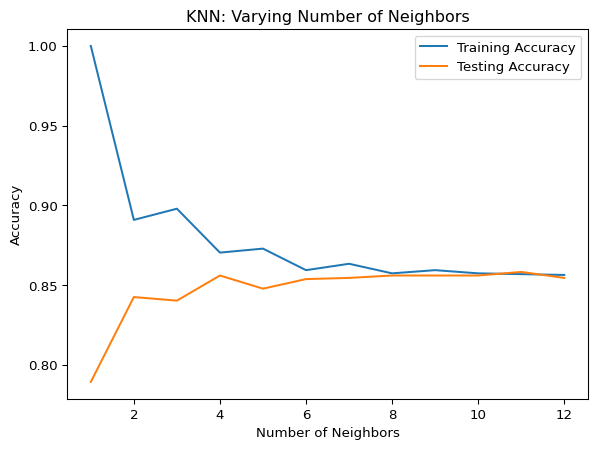

In [16]:
import matplotlib.pyplot as plt

# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label='Training Accuracy')

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label='Testing Accuracy')

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

Observa cómo la precisión del entrenamiento disminuye y la precisión de la prueba aumenta a medida que el número de vecinos aumenta. Para el conjunto de prueba, la precisión alcanza su punto máximo con 7 vecinos, lo que sugiere que es el valor óptimo para el modelo. ¡Ahora exploremos los modelos de regresión!